# Problem Statement / Business Understanding:
- Accurately predicting weather conditions is crucial for various sectors such as agriculture, transportation, and disaster management. This project aims to classify weather types to improve decision-making and preparedness for adverse weather events.

# Objective:
- To develop a machine learning model that accurately classifies weather conditions based on various meteorological features such as temperature, humidity, wind speed, precipitation, UV index, visibility, atmospheric pressure, location, cloud cover, and season.

# Constraints:
- Availability and quality of historical weather data.
- Handling missing or inconsistent data entries.
- Model interpretability and deployment for real-time weather prediction

In [45]:
import pandas as pd
import numpy as np
import sweetviz
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [46]:
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv(r"C:\Users\mahes\OneDrive\Desktop\x\weather_classification_data.csv")

In [48]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
report=sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [6]:
report.show_html('eda report.html')

Report eda report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

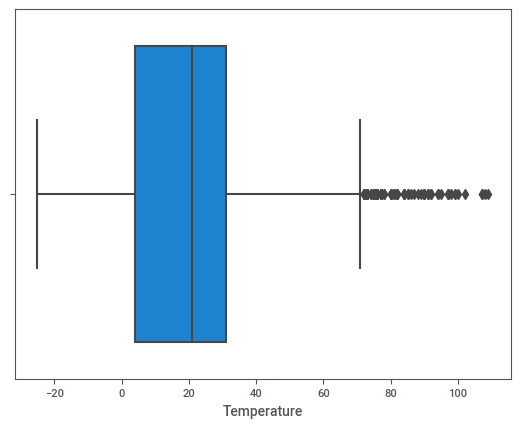

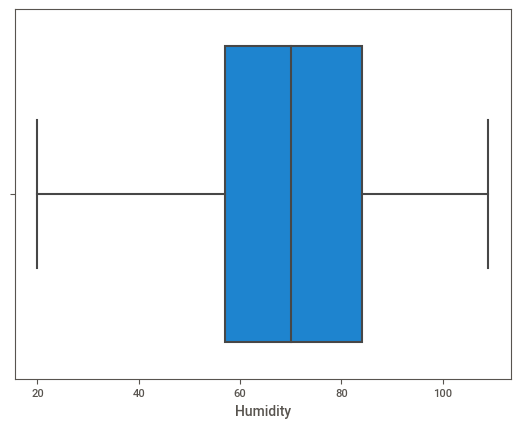

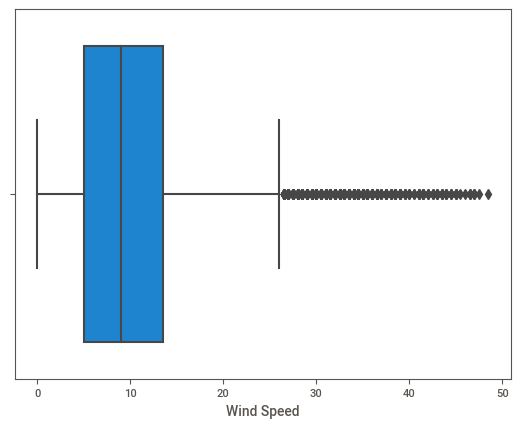

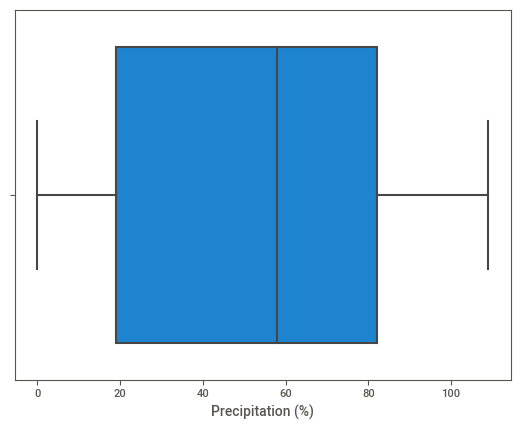

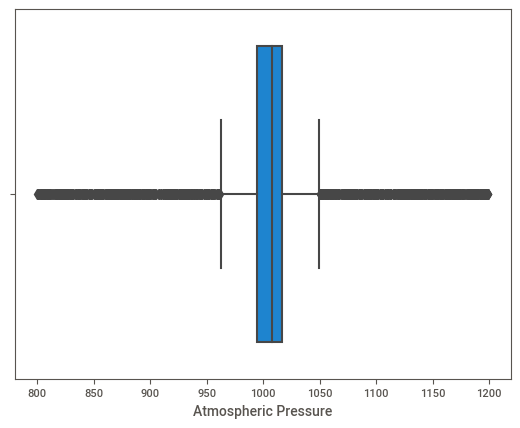

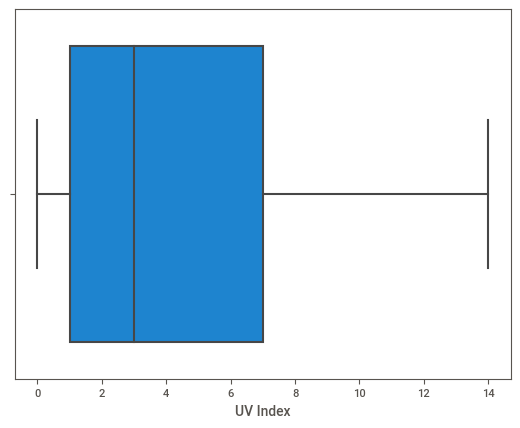

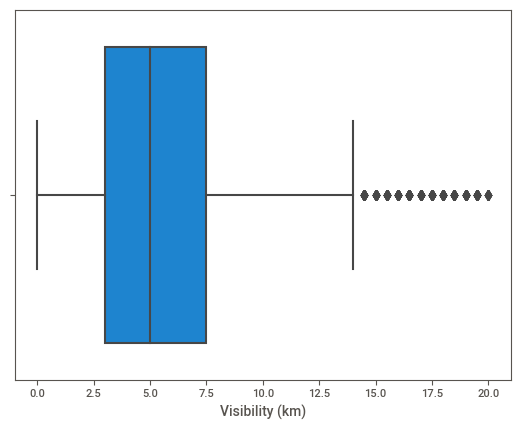

In [50]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

<Axes: >

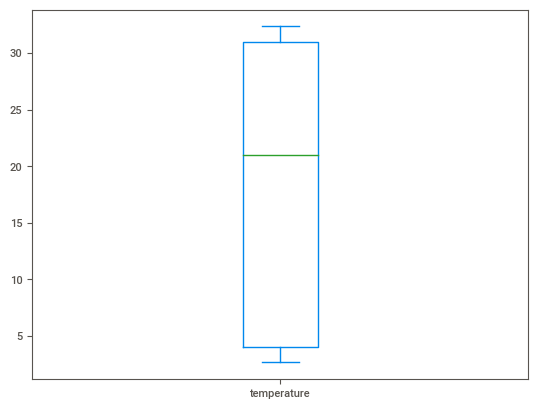

In [51]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
df['temperature']=win.fit_transform(df[['Temperature']])
df['temperature'].plot(kind='box')

<Axes: >

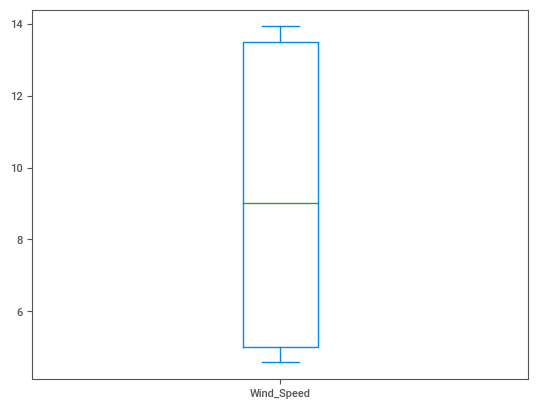

In [52]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
df['Wind_Speed']=win.fit_transform(df[['Wind Speed']])
df['Wind_Speed'].plot(kind='box')

<Axes: >

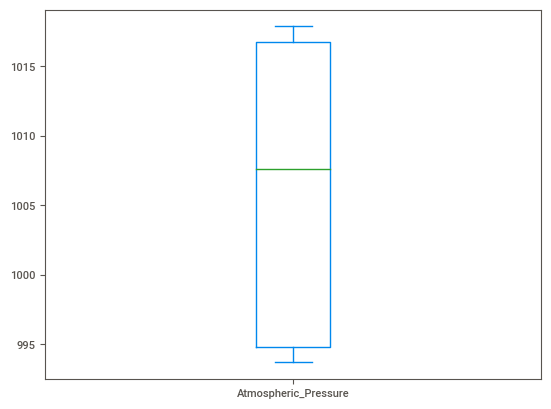

In [53]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
df['Atmospheric_Pressure']=win.fit_transform(df[['Atmospheric Pressure']])
df['Atmospheric_Pressure'].plot(kind='box')

<Axes: >

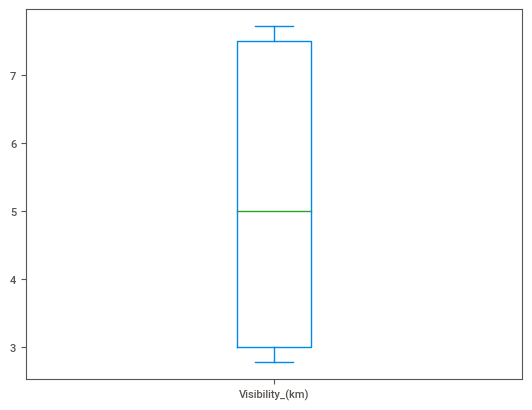

In [54]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=0.05)
df['Visibility_(km)']=win.fit_transform(df[['Visibility (km)']])
df['Visibility_(km)'].plot(kind='box')


In [55]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,temperature,Wind_Speed,Atmospheric_Pressure,Visibility_(km)
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,14.00,9.500,1010.820000,3.500
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,32.35,8.500,1011.430000,7.725
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,30.00,7.000,1017.871125,5.500
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,32.35,4.575,1017.871125,2.775
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,27.00,13.925,993.701375,2.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,10.00,13.925,1003.150000,2.775
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,2.65,4.575,1017.871125,6.000
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,30.00,5.500,1012.690000,7.725
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,3.00,10.000,993.701375,2.775


In [56]:
df.drop(['Temperature','Wind Speed','Atmospheric Pressure','Visibility (km)'],axis=1,inplace=True)

In [57]:
df

,Humidity,Precipitation (%),Cloud Cover,UV Index,Season,Location,Weather Type,temperature,Wind_Speed,Atmospheric_Pressure,Visibility_(km)
0,73,82.0,partly cloudy,2,Winter,inland,Rainy,14.00,9.500,1010.820000,3.500
1,96,71.0,partly cloudy,7,Spring,inland,Cloudy,32.35,8.500,1011.430000,7.725
2,64,16.0,clear,5,Spring,mountain,Sunny,30.00,7.000,1017.871125,5.500
3,83,82.0,clear,7,Spring,coastal,Sunny,32.35,4.575,1017.871125,2.775
4,74,66.0,overcast,1,Winter,mountain,Rainy,27.00,13.925,993.701375,2.775
...,...,...,...,...,...,...,...,...,...,...,...
13195,74,71.0,overcast,1,Summer,mountain,Rainy,10.00,13.925,1003.150000,2.775
13196,76,23.0,cloudy,1,Winter,coastal,Snowy,2.65,4.575,1017.871125,6.000
13197,77,28.0,overcast,3,Autumn,coastal,Cloudy,30.00,5.500,1012.690000,7.725
13198,76,94.0,overcast,0,Winter,inland,Snowy,3.00,10.000,993.701375,2.775


In [58]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [59]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [60]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [77]:
num=['temperature','Humidity','Wind_Speed','Precipitation (%)','Atmospheric_Pressure','UV Index','Visibility_(km)']
nomin=['Location','Cloud Cover']
ordin=['Season']


In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
numerical=Pipeline([('Mean Imputation',SimpleImputer()),
                   
                   
                   ('Scaling',StandardScaler())])
numerical

Pipeline(steps=[('Mean Imputation', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [81]:
nomial=Pipeline([('Mode Imputation',SimpleImputer(strategy='most_frequent')),
         
         ('encoding',OneHotEncoder(drop='first'))])
nomial

Pipeline(steps=[('Mode Imputation', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder(drop='first'))])

In [82]:
ordinal=Pipeline([('Mode Imputation',SimpleImputer(strategy='most_frequent')),
         
         ('encoding',OneHotEncoder())])
ordinal

Pipeline(steps=[('Mode Imputation', SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder())])

In [83]:
from sklearn.compose import ColumnTransformer

In [84]:
preprocess=ColumnTransformer([('numerical',numerical,num),           # merge the all pipelines like numerical,nominal,ordinal
                  ('nomial',nomial,nomin),                # num is column: num ,name:numerical,transformer:numerical
                  ('ordinal',ordinal,ordin)])
preprocess

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Scaling',
                                                  StandardScaler())]),
                                 ['temperature', 'Humidity', 'Wind_Speed',
                                  'Precipitation (%)', 'Atmospheric_Pressure',
                                  'UV Index', 'Visibility_(km)']),
                                ('nomial',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Location', 'Cloud Cover']),
                                ('ordinal',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder())]),
                                 ['Season'])])

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model=Pipeline([('Preprocessing',preprocess),
               ('Model',LogisticRegression())])

In [87]:
model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['temperature', 'Humidity',
                                                   'Wind_Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric_Pressure',
                                                   'UV Index',
                                                   'Visibility_(km)']),
                                                 ('nomial',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Location', 'Cloud Cover']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Season'])])),
                ('Model', LogisticRegression())])

In [88]:
df.head(1)

,Humidity,Precipitation (%),Cloud Cover,UV Index,Season,Location,Weather Type,temperature,Wind_Speed,Atmospheric_Pressure,Visibility_(km)
0,73,82.0,partly cloudy,2,Winter,inland,Rainy,14.0,9.5,1010.82,3.5


In [89]:
x=df.drop('Weather Type',axis=1)
y=df['Weather Type']

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [92]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8856060606060606

In [93]:
from sklearn.tree import DecisionTreeClassifier
model=Pipeline([('Preprocessing',preprocess),
               ('Model',DecisionTreeClassifier())])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9003787878787879

In [94]:
from sklearn.svm import SVC
model=Pipeline([('Preprocessing',preprocess),
               ('Model',DecisionTreeClassifier())])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8962121212121212

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model=Pipeline([('Preprocessing',preprocess),
               ('Model',KNeighborsClassifier())])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8871212121212121

In [96]:
from sklearn.neighbors import KNeighborsClassifier
model=Pipeline([('Preprocessing',preprocess),
               ('Model',KNeighborsClassifier())])
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8871212121212121

In [97]:
import pickle

In [101]:
pickle.dump(model,open("model.pkl","wb"))